In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv("featurextacted.csv")

In [3]:
df.head()

,Unnamed: 0,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,0,25 Adorable Animals To Brighten Your Day,1,40.0,4.857143,0.285714,1.0,7.0,1.0,0.0,0.0,0.5,1.0
1,1,Myanmar Junta threatened with sanctions by UN ...,0,50.0,5.375000,0.250000,1.0,8.0,2.0,0.0,0.0,0.0,0.0
2,2,Fannie Mae Says It Needs Another $15 Billion,0,44.0,4.625000,0.250000,3.0,8.0,4.0,0.0,0.0,0.0,0.0
3,3,World's most-spammed man,0,24.0,7.333333,0.000000,3.0,3.0,5.0,0.0,0.0,0.0,0.0
4,4,Yankees power surge blacks out Sox relief in 8...,0,52.0,4.300000,0.200000,5.0,10.0,6.0,0.0,0.0,0.8,0.4


In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.head()

,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,25 Adorable Animals To Brighten Your Day,1,40.0,4.857143,0.285714,1.0,7.0,1.0,0.0,0.0,0.5,1.0
1,Myanmar Junta threatened with sanctions by UN ...,0,50.0,5.375000,0.250000,1.0,8.0,2.0,0.0,0.0,0.0,0.0
2,Fannie Mae Says It Needs Another $15 Billion,0,44.0,4.625000,0.250000,3.0,8.0,4.0,0.0,0.0,0.0,0.0
3,World's most-spammed man,0,24.0,7.333333,0.000000,3.0,3.0,5.0,0.0,0.0,0.0,0.0
4,Yankees power surge blacks out Sox relief in 8...,0,52.0,4.300000,0.200000,5.0,10.0,6.0,0.0,0.0,0.8,0.4


In [6]:
#Splitting the Data into Train and Test with 0.25 as test sets
X_train,X_test,y_train,y_test=train_test_split(df.Clickbaits,df.bait,test_size=0.20,random_state=0)

In [7]:
#Using the Tfid Vectorizer because the size of the dataset is Large
vectorizer = TfidfVectorizer()
tfidf_train_x = vectorizer.fit_transform(X_train)

In [8]:
#Now using the Logistic Regression Algorithm
classifier = LogisticRegression(penalty="l2")
classifier.fit(tfidf_train_x, y_train)

/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#After transform the test data will be stored as a float in case of TFID
tfidf_test_x = vectorizer.transform(X_test)
print(tfidf_test_x.shape)
tfidf_test_x

(6400, 20715)


<6400x20715 sparse matrix of type '<class 'numpy.float64'>'
	with 54315 stored elements in Compressed Sparse Row format>

In [10]:
predicted = classifier.predict(tfidf_test_x)

In [11]:
#Finding the Accuracy Score for the Algorithm
accuracy = cross_val_score(classifier, tfidf_test_x, y_test, cv=5)
acc = accuracy.mean()
print(acc * 100)

94.46863749497221


/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,predicted)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,predicted)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix1 = confusion_matrix(y_test,predicted)
print(matrix1)

Accuracy: 0.962656
Precision: 0.974416
Recall: 0.951280
F1 score: 0.962709
ROC AUC: 0.962811
[[3076   81]
 [ 158 3085]]


In [13]:
#Enter anything to check its validity
print("Enter the sentence or phrase you want to validate: \n\n")
inpPhrase = [input()]
output = classifier.predict(vectorizer.transform(inpPhrase))
print("---------------------------------------------------------")
if output == 1:
    print("CLICKBAIT")
else:
    print("NOT a CLICKBAIT")
print("---------------------------------------------------------")

Enter the sentence or phrase you want to validate: 


i am a good person
---------------------------------------------------------
NOT a CLICKBAIT
---------------------------------------------------------


In [14]:
# save the model to disk
filename = 'finalVECTORmodel.sav'
pickle.dump(classifier, open(filename, 'wb'))

# some time later...
inpPhrase = [input()]
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
output = loaded_model.predict(vectorizer.transform(inpPhrase))
# predicted = loaded_model.predict(tfidf_test_x)
# classify = loaded_model.predict("get a chance to win $10,000 by clicking this link")
# accuracy = accuracy_score(y_test,result)
# accuracy
output[0]

0

In [15]:
predicted[0]

1

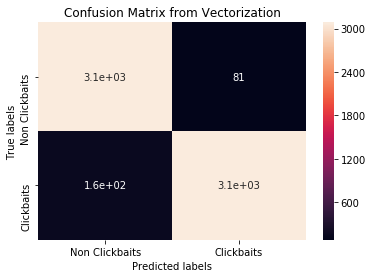

In [16]:
import seaborn as sns

ax= plt.subplot()
fig = sns.heatmap(matrix1, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix from Vectorization'); 
ax.xaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
ax.yaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
fig = fig.get_figure()
fig.savefig("ConfMatrix1.png")

In [17]:
df.head(10)

,Clickbaits,bait,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
0,25 Adorable Animals To Brighten Your Day,1,40.0,4.857143,0.285714,1.0,7.0,1.0,0.0,0.0,0.5,1.0
1,Myanmar Junta threatened with sanctions by UN ...,0,50.0,5.375000,0.250000,1.0,8.0,2.0,0.0,0.0,0.0,0.0
2,Fannie Mae Says It Needs Another $15 Billion,0,44.0,4.625000,0.250000,3.0,8.0,4.0,0.0,0.0,0.0,0.0
3,World's most-spammed man,0,24.0,7.333333,0.000000,3.0,3.0,5.0,0.0,0.0,0.0,0.0
4,Yankees power surge blacks out Sox relief in 8...,0,52.0,4.300000,0.200000,5.0,10.0,6.0,0.0,0.0,0.8,0.4
5,US congressmen sue Obama for military action i...,0,53.0,5.000000,0.333333,5.0,9.0,7.0,0.0,0.0,0.0,0.1
6,"In Sri Lanka, Kouchner and Miliband Urge Truce",0,46.0,4.875000,0.250000,5.0,8.0,7.0,0.0,1.0,0.0,0.0
7,NCAA Football: Three Gopher players arrested f...,0,71.0,7.000000,0.111111,6.0,9.0,9.0,0.0,1.0,0.0,0.1
8,A Girl Snapchatted Herself As Disney Princesse...,1,65.0,5.000000,0.545455,6.0,11.0,10.0,1.0,2.0,1.0,1.0
9,Plan to Shift Military Spending Faces Skepticism,0,48.0,6.000000,0.142857,6.0,7.0,13.0,1.0,2.0,-0.1,0.1


## Training Data

In [18]:
X = df.drop(["Clickbaits","bait"],axis=1)
y = df.bait

In [19]:
#Splitting the Data into Train and Test with 0.25 as test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [20]:
logmodel = LogisticRegression(penalty="l2")

In [21]:
logmodel.fit(X_train,y_train)

/home/prajwol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predicted = logmodel.predict(X_test)

In [23]:
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       0.78      0.79      0.79      3157\n           1       0.79      0.79      0.79      3243\n\n    accuracy                           0.79      6400\n   macro avg       0.79      0.79      0.79      6400\nweighted avg       0.79      0.79      0.79      6400\n'

In [24]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,predicted)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,predicted)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix2 = confusion_matrix(y_test,predicted)
print(matrix2)

Accuracy: 0.788438
Precision: 0.794512
Recall: 0.785692
F1 score: 0.790078
ROC AUC: 0.788475
[[2498  659]
 [ 695 2548]]


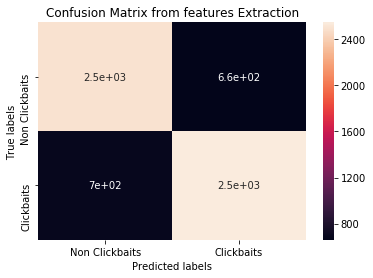

In [25]:
import seaborn as sns

ax= plt.subplot()
fig = sns.heatmap(matrix2, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix from features Extraction'); 
ax.xaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
ax.yaxis.set_ticklabels(['Non Clickbaits', 'Clickbaits'])
fig = fig.get_figure()
fig.savefig("ConfMatrix2.png")

In [26]:
accuracy_score(y_test,predicted)

0.7884375

In [27]:
# save the model to disk
filename = 'finalFEATUREmodel.sav'
pickle.dump(logmodel, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
# classify = loaded_model.predict("get a chance to win $10,000 by clicking this link")
print(result)

0.7884375


In [28]:
X_test.head()

,Length,AvgWordLength,StoptoContent,Cardinality,WordCount,Verb,Auxiliary,CoorConj,polarity,subjectivity
31330,39.0,4.714286,0.571429,12110.0,7.0,37934.0,10389.0,3592.0,0.000000,0.000000
3514,70.0,4.916667,0.416667,1342.0,12.0,4288.0,1188.0,416.0,-0.155556,0.288889
12363,45.0,4.750000,0.375000,4703.0,8.0,14996.0,4052.0,1389.0,0.000000,0.000000
25927,55.0,4.600000,0.300000,10000.0,10.0,31345.0,8562.0,2957.0,1.000000,1.000000
31886,62.0,5.300000,0.300000,12297.0,10.0,38638.0,10581.0,3654.0,0.136364,0.454545


In [29]:
df["Clickbaits"][9]

'Plan to Shift Military Spending Faces Skepticism'